In [96]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin_bfgs as opt

In [77]:
def f(x):
    y = float(x[0])**2 + float(x[1])**2
    return y
def f2(x):
    y = 10*x[0]**2 + 10*x[1]**2
    return y
def gradf2(x):
    g = np.array([20*x[0], 20*x[1]])
    return g    
def h(x):
    y = (x[0]+2)**2 + (x[1]+4)**2 + (x[0]-3)**2 + (x[0]-2)**2
    return y
def normal(x):
    y = -np.exp(-(x[0]**2 + x[1]**2)/2)
    return y
def normals(x):
    y = -np.exp(-(x[0]**2 + x[1]**2)/2) - np.exp(-((x[0]-3)**2 + (x[1]-3)**2)/2)
    return y
def gradnormals(x):
    y0 = x[0]*np.exp(-(x[0]**2 + x[1]**2)/2) + (x[0] - 3) *np.exp(-((x[0]-3)**2 + (x[1]-3)**2)/2)
    y1 = x[1]*np.exp(-(x[0]**2 + x[1]**2)/2) + (x[1] - 3) *np.exp(-((x[0]-3)**2 + (x[1]-3)**2)/2)
    y = np.array([y0, y1])
    return y
def nonconvex(x):
    y = x[0] * x[1]
    return y
def gradnonconvex(x):
    y = np.array([x[1], x[0]])
    return y
def g(x):
    y = x[0]**2 + x[1]**2 + x[2]**2
    return y
def weird(x):
    y = 10*x[0]**2 + np.sin(x[1])**2
    return y

In [44]:
x = np.array([5.0,3.0])
y = np.array([2.0,3.0,4.0])
def derivative(f, x, var, epsilon):
    y = np.copy(x)
    y[var] += epsilon
    return ((f(y) - f(x))/epsilon)

In [45]:
def gradient(f,x,epsilon):
    grad = np.array([0.]*len(x))
    for i in range(len(x)):
        grad[i] = derivative(f, x, i, epsilon)
    return grad

In [46]:
x = np.array([1.,2.])
print gradient(normal, x, 0.01)
print gradient(f, x, 0.01)
print gradient(nonconvex, x, 0.01)

[ 0.08208227  0.16294148]
[ 2.01  4.01]
[ 2.  1.]


In [47]:
print derivative(f,x,1,0.01)
print gradient(f,x,0.2)
#gradientDescent(f, x, 0.01, 0.01, 100)

4.01
[ 2.2  4.2]


In [48]:
def gradientDescent2(f, gradf, x_ini, step, stop, iterMax):
    x1 = np.copy(x_ini)
    y1 = f(x1)
    y0 = f(x1) + stop + 1
    nbIter = 0
    hist = [np.append(x1,y1)]
    while (abs(y1 - y0) >= stop) & (nbIter <= iterMax):
        nbIter += 1
        grad = gradf(x1)
        x0 = np.copy(x1)
        x1 = np.copy(x0) - step*grad
        y0 = f(x0)
        y1 = f(x1)
        hist = np.append(hist, [np.append(x1,y1)], axis = 0)
    return(hist)

In [49]:
def gradientDescent(f, x_ini, step, stop, iterMax):
    x1 = np.copy(x_ini)
    y1 = f(x1)
    y0 = f(x1) + stop + 1
    nbIter = 0
    hist = [np.append(x,y1)]
    while (abs(y1 - y0) >= stop) & (nbIter <= iterMax):
        nbIter += 1
        grad = gradient(f, x1, step/10)
        x0 = np.copy(x1)
        x1 = np.copy(x1) - step*grad
        y0 = f(x0)
        y1 = f(x1)
        hist = np.append(hist, [np.append(x1,y1)], axis = 0)
    return(hist)

In [50]:
def computeZ(f, m, M):
    nb = 500
    rangeX = np.linspace(m, M, nb)
    rangeY = np.linspace(m, M, nb)
    Z = np.array([[0.]*len(rangeX)]*len(rangeY))
    for x in range(len(rangeX)):
        for y in range(len(rangeY)):
            a = [rangeX[x],rangeY[y]]
            Z[x,y] = f(a)
    return (rangeX,rangeY,Z)

88
Optimization terminated successfully.
         Current function value: -0.210798
         Iterations: 3
         Function evaluations: 9
         Gradient evaluations: 9
[ 1.50024717  1.49975283]


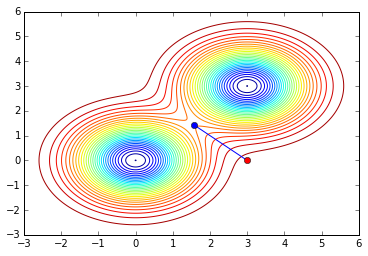

In [102]:
x = np.array([3.,0.])
fig = plt.figure()
GD = gradientDescent2(normals, gradnormals,x,0.3,0.0001,1000)
plt.plot(GD[:,0],GD[:,1])
plt.plot(GD[-1:,0],GD[-1:,1], marker = "o", color = "blue")
plt.plot(GD[0,0],GD[0,1], marker = "o", color = "red")
X,Y,Z = computeZ(normals,-3.,6.)
plt.contour(X,Y,Z,np.linspace(-1,0,30))
#plt.show()
plt.savefig("Figures/Q1/normals.png", dpi = 100)
print len(GD)
print opt(normals,x, fprime = gradnormals, gtol = 0.0001)

57
Optimization terminated successfully.
         Current function value: -1.000124
         Iterations: 9
         Function evaluations: 21
         Gradient evaluations: 21
[ 0.00035351  0.00040188]


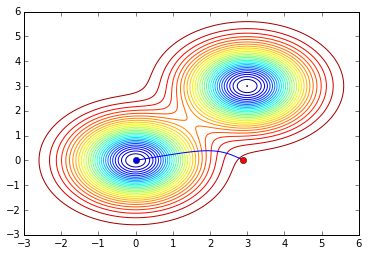

In [106]:
x = np.array([2.9,0.])
fig = plt.figure()
GD = gradientDescent2(normals, gradnormals,x,0.3,0.0001,1000)
plt.plot(GD[:,0],GD[:,1])
plt.plot(GD[-1:,0],GD[-1:,1], marker = "o", color = "blue")
plt.plot(GD[0,0],GD[0,1], marker = "o", color = "red")
X,Y,Z = computeZ(normals,-3.,6.)
plt.contour(X,Y,Z,np.linspace(-1,0,30))
#plt.show()
plt.savefig("Figures/Q1/normals2.png", dpi = 100)
print len(GD)
print opt(normals,x, fprime = gradnormals, gtol = 0.0001)

66
Optimization terminated successfully.
         Current function value: -1.000124
         Iterations: 8
         Function evaluations: 28
         Gradient evaluations: 28
[ 2.99963083  2.99962419]


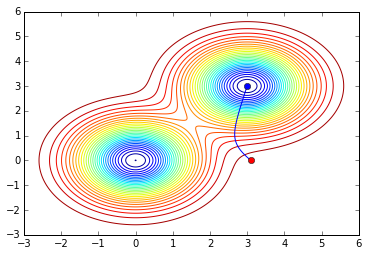

In [108]:
x = np.array([3.1,0.])
fig = plt.figure()
GD = gradientDescent2(normals, gradnormals,x,0.3,0.0001,1000)
plt.plot(GD[:,0],GD[:,1])
plt.plot(GD[-1:,0],GD[-1:,1], marker = "o", color = "blue")
plt.plot(GD[0,0],GD[0,1], marker = "o", color = "red")
X,Y,Z = computeZ(normals,-3.,6.)
plt.contour(X,Y,Z,np.linspace(-1,0,30))
#plt.show()
plt.savefig("Figures/Q1/normals3.png", dpi = 100)
print len(GD)
print opt(normals,x, fprime = gradnormals, gtol = 0.0001)

In [ ]:
gradient(normals, )

21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
[  2.22044605e-16   1.11022302e-16]


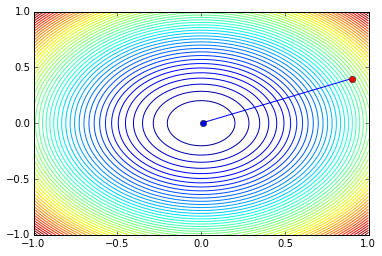

In [110]:
fig = plt.figure()
x = np.array([0.9,0.4])
GD = gradientDescent2(f2, gradf2,x,0.01,0.001,1000)
plt.plot(GD[:,0],GD[:,1])
plt.plot(GD[-1:,0],GD[-1:,1], marker = "o", color = "blue")
plt.plot(GD[0,0],GD[0,1], marker = "o", color = "red")
X,Y,Z = computeZ(f2,-1.,1.)
plt.contour(X,Y,Z,np.linspace(0,20,50))
#plt.show()
plt.savefig("Figures/Q1/bowl.png", dpi = 100)
print len(GD)
print opt(f2,x, fprime = gradf2, gtol = 0.001)

21


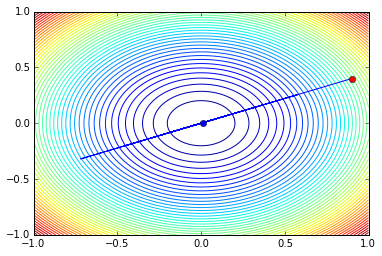

In [62]:
fig = plt.figure()
x = np.array([0.9,0.4])
GD = gradientDescent2(f2, gradf2,x,0.09,0.001,1000)
plt.plot(GD[:,0],GD[:,1])
plt.plot(GD[-1:,0],GD[-1:,1], marker = "o", color = "blue")
plt.plot(GD[0,0],GD[0,1], marker = "o", color = "red")
X,Y,Z = computeZ(f2,-1.,1.)
plt.contour(X,Y,Z,np.linspace(0,20,50))
#plt.show()
plt.savefig("Figures/Q1/bowl4.png", dpi = 100)
print len(GD)

2


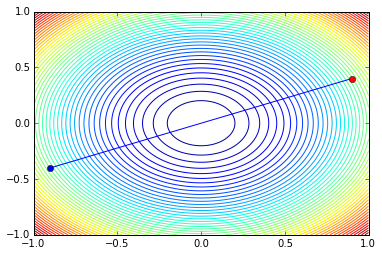

In [64]:
fig = plt.figure()
x = np.array([0.9,0.4])
GD = gradientDescent2(f2, gradf2, x,0.1,0.001,4)
plt.plot(GD[:,0],GD[:,1])
plt.plot(GD[-1:,0],GD[-1:,1], marker = "o", color = "blue")
plt.plot(GD[0,0],GD[0,1], marker = "o", color = "red")
X,Y,Z = computeZ(f2,-1.,1.)
plt.contour(X,Y,Z,np.linspace(0,20,50))
#plt.show()
plt.savefig("Figures/Q1/bowl2.png", dpi = 100)
print len(GD)

5


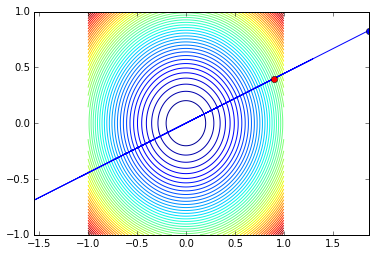

In [65]:
fig = plt.figure()
x = np.array([0.9,0.4])
GD = gradientDescent2(f2, gradf2, x,0.11,0.001,3)
plt.plot(GD[:,0],GD[:,1])
plt.plot(GD[-1:,0],GD[-1:,1], marker = "o", color = "blue")
plt.plot(GD[0,0],GD[0,1], marker = "o", color = "red")
X,Y,Z = computeZ(f2,-1.,1.)
plt.contour(X,Y,Z,np.linspace(0,20,50))
#plt.show()
plt.savefig("Figures/Q1/bowl3.png", dpi = 100)
print len(GD)

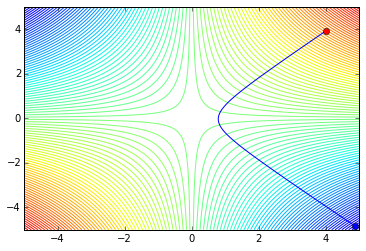

In [87]:
x = np.array([4.,3.9])
fig = plt.figure()
GD = gradientDescent2(nonconvex, gradnonconvex, x,0.1,0.001, 47)
plt.plot(GD[:,0],GD[:,1])
plt.plot(GD[-1:,0],GD[-1:,1], marker = "o", color = "blue")
plt.plot(GD[0,0],GD[0,1], marker = "o", color = "red")
X,Y,Z = computeZ(nonconvex,-5.,5.)
plt.contour(X,Y,Z, np.linspace(-30,30,120))
plt.legend()
#plt.show()
plt.savefig("Figures/Q1/nonconv.png", dpi = 100)


41
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 2
         Gradient evaluations: 2
[ 0.  0.]


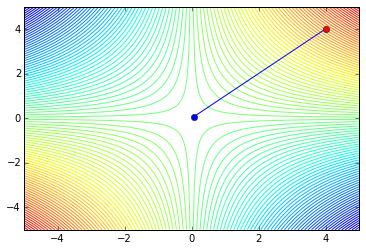

In [109]:
x = np.array([4.,4])
fig = plt.figure()
GD = gradientDescent2(nonconvex,gradnonconvex, x,0.1,0.001, 71)
plt.plot(GD[:,0],GD[:,1])
plt.plot(GD[-1:,0],GD[-1:,1], marker = "o", color = "blue")
plt.plot(GD[0,0],GD[0,1], marker = "o", color = "red")
X,Y,Z = computeZ(nonconvex,-5.,5.)
plt.contour(X,Y,Z, np.linspace(-30,30,120))
plt.legend()
#plt.show()
plt.savefig("Figures/Q1/nonconv2.png", dpi = 100)
print len(GD)
print opt(nonconvex,x, fprime = gradnonconvex, gtol = 0.001)